In [59]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7),(6,8),(3,8),(0,9)]

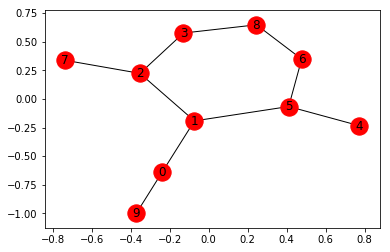

In [60]:
goal = 5

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [61]:
# how many points in graph? x points
MATRIX_SIZE = len(points_list)

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R


matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [71]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

pd.DataFrame(R)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
(6, 8)
(3, 8)
(0, 9)


,0,1,2,3,4,5,6,7,8,9
0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,0.0,-1.0,0.0,-1.0,-1.0,100.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,100.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,0.0,-1.0,-1.0,0.0,100.0,0.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,100.0,-1.0,-1.0,0.0,-1.0
7,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
9,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [69]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_act):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value

  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

0

Trained Q matrix:
[[  0.          79.55428575   0.           0.           0.
    0.           0.           0.           0.          50.91474288]
 [ 62.94700009   0.          62.94700009   0.           0.
   99.44285719   0.           0.           0.           0.        ]
 [  0.          79.55428575   0.          50.35760007   0.
    0.           0.          50.91474288   0.           0.        ]
 [  0.           0.          63.6434286    0.           0.
    0.           0.           0.          62.94700009   0.        ]
 [  0.           0.           0.           0.           0.
  100.           0.           0.           0.           0.        ]
 [  0.          79.55428575   0.           0.          79.55428575
   99.85386418  79.55428575   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   99.85386418   0.           0.          63.6434286    0.        ]
 [  0.           0.          63.6434286    0.           0.
    0.           0.       

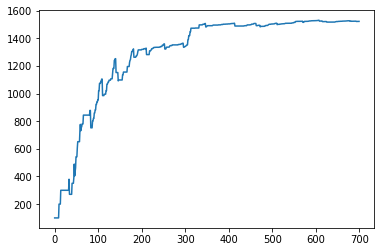

In [70]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)

    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 9
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [67]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,369.41323,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,236.424467
1,295.530584,0.00000,295.530584,0.000000,0.00000,461.766538,0.00000,0.000000,0.000000,0.000000
2,0.000000,369.41323,0.000000,236.424467,0.00000,0.000000,0.00000,236.424467,0.000000,0.000000
3,0.000000,0.00000,295.530584,0.000000,0.00000,0.000000,0.00000,0.000000,281.766538,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.00000,469.413230,0.00000,0.000000,0.000000,0.000000
5,0.000000,369.41323,0.000000,0.000000,369.41323,461.766538,369.41323,0.000000,0.000000,0.000000
6,0.000000,0.00000,0.000000,0.000000,0.00000,469.413230,0.00000,0.000000,295.530584,0.000000
7,0.000000,0.00000,295.530584,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.00000,0.000000,236.424467,0.00000,0.000000,369.41323,0.000000,0.000000,0.000000
9,295.530584,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
